In [13]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from importlib import reload

# from google.colab import drive
# drive.mount("/content/drive", force_remount=True)

<Figure size 1000x1000 with 0 Axes>

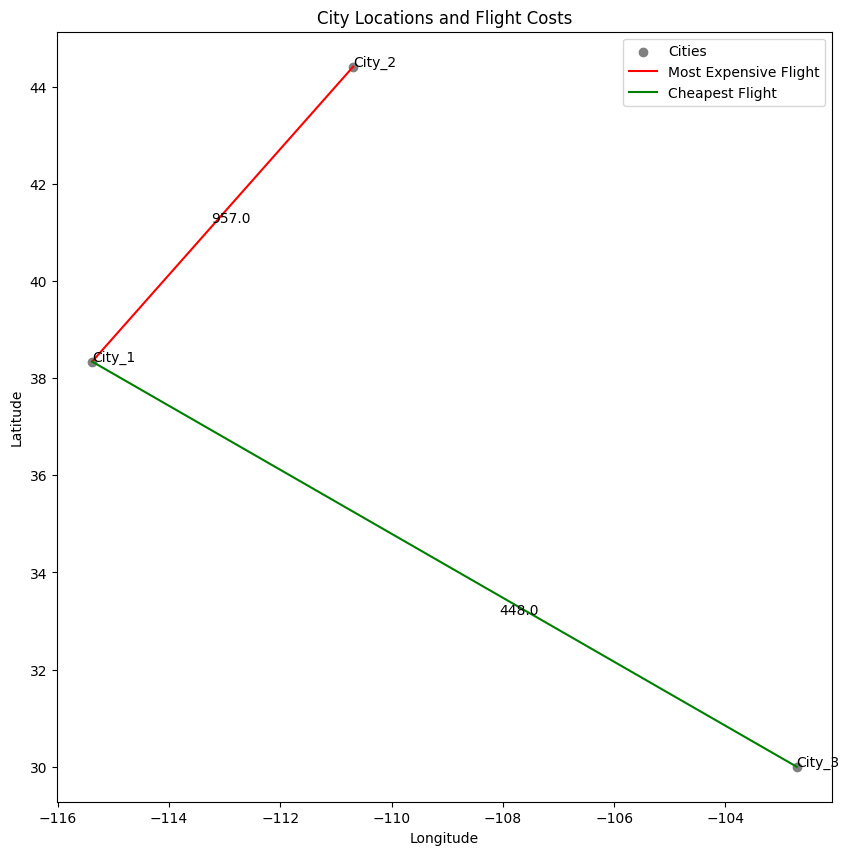

In [14]:
# ---
# Group No. 10
#1. นางสาวณัฐชา บุญเฉย 6410450435
#2. นางสาวอิงกมล ขาวกมล 6410450656
#3. นางสาวชลดา บำรุงรส 6410450401
#4. นายณรงค์เดช สำเร็จประสงค์ 6410450427
# ---

group = 10 # กลุ่มที่

problem = 5 # ปัญหาที่
data_num = 1 # ชุดข้อมูลที่

# ชุดข้อมูลเก็บใน /in
in_path = "./dataset/P"+str(problem)+"/in/"
data_path = in_path+"p"+str(problem)+"_input_dataset_"+str(data_num)+".csv"

# ผลลัพธ์เก็บใน /out
out_path = "./dataset/P"+str(problem)+"/out/"
result_path = out_path+"p"+str(problem)+"_group"+str(group)+"-output"+str(data_num)+".csv"
png_path = out_path+"p"+str(problem)+"_group"+str(group)+"-plot"+str(data_num)+".png"

# อ่านข้อมูล
data = pd.read_csv(data_path)

# --- เริ่มเขียนโค้ดตรงนี้ ---
data3={'OriginCity':[],
       'OriginLat':[],
       'OriginLong':[],
       'DestCity':[],
       'DestLat':[],
       'DestLong':[],
       'Distance':[],
       'TimeOfFlight':[],
       'AirFarePrice':[]}

df = pd.DataFrame(data3)

maxrow = data['AirFarePrice'].idxmax()
minrow = data['AirFarePrice'].idxmin()

new_row = {'OriginCity':data.iloc[maxrow,0],
       'OriginLat':data.iloc[maxrow,1],
       'OriginLong':data.iloc[maxrow,2],
       'DestCity':data.iloc[maxrow,3],
       'DestLat':data.iloc[maxrow,4],
       'DestLong':data.iloc[maxrow,5],
       'Distance':data.iloc[maxrow,6],
       'TimeOfFlight':data.iloc[maxrow,7],
       'AirFarePrice':data.iloc[maxrow,8]}

df.loc[len(df)] = new_row

new_row = {'OriginCity':data.iloc[minrow,0],
       'OriginLat':data.iloc[minrow,1],
       'OriginLong':data.iloc[minrow,2],
       'DestCity':data.iloc[minrow,3],
       'DestLat':data.iloc[minrow,4],
       'DestLong':data.iloc[minrow,5],
       'Distance':data.iloc[minrow,6],
       'TimeOfFlight':data.iloc[minrow,7],
       'AirFarePrice':data.iloc[minrow,8]}

df.loc[len(df)] = new_row

data = df

x = [data.iloc[maxrow,1],data.iloc[maxrow,4],data.iloc[minrow,4]]
y = [data.iloc[maxrow,2],data.iloc[maxrow,5],data.iloc[minrow,5]]

x1 = [data.iloc[maxrow,1],data.iloc[maxrow,4]]
y1 = [data.iloc[maxrow,2],data.iloc[maxrow,5]]

x2 = [data.iloc[maxrow,1],data.iloc[minrow,4]]
y2 = [data.iloc[maxrow,2],data.iloc[minrow,5]]

n = [data.iloc[maxrow,0],data.iloc[maxrow,3],data.iloc[minrow,3]]

plt = reload(plt)
plt.figure(figsize=(10,10))
fig, ax = plt.subplots(figsize=(10,10))

plt.scatter(y,x, c="gray")

for i, txt in enumerate(n):
  ax.annotate(txt,(y[i], x[i]))

plt.plot(y1, x1, 'r-')
plt.annotate(data.iloc[maxrow,8], (y1[0],x1[0]), textcoords="offset points",xytext=(100,100),ha="center")

plt.plot(y2, x2, 'g-')
plt.annotate(data.iloc[minrow,8], (y2[1],x2[1]), textcoords="offset points",xytext=(-200,110),ha="center")


plt.xlabel('Longitude')
plt.ylabel('Latitude')

plt.title('City Locations and Flight Costs')

plt.legend(["Cities","Most Expensive Flight", "Cheapest Flight"])



# --- สิ้นสุดโค้ดตรงนี้ ---

# เซฟผลลัพธ์
data.to_csv(result_path, index=False)

# แสดงผลลัพธ์
data.head()

# เซฟกราฟ
plt.savefig(png_path, dpi=100)

# แสดงผลกราฟ
plt.show()